# MOwNiT 
## Laboratorium
### Iteracyjne metody rozwiązywania równań liniowych

Przykład: Temperatura w stanie stacjonarnym 

Obliczyć rozkład temperatury na kwadratowej płytce w układzie o ustalonych temperaturach na brzegach (brzegi mają różną temperaturę)

Rozkład spełnia równanie Laplace'a

$\frac{\partial^2 	T(x,y)}{\partial x^2}+   \frac {\partial^2 	T(x,y)}{\partial y^2}=0$

Tworzymy rozwiązanie początkowe, siatka nxn, ustawiamy temperaturę na brzegach,  w środku, jako początkową wartość "zgadujemy" 0

In [4]:

function create_initial_solution(n)
    T = zeros(n, n)
    hot_temp=100
    cold_temp=10
    # Ustawienie warunków brzegowych 
    T[1, :] .= hot_temp
    T[n,:] .= hot_temp
    T[:,1].= hot_temp
    T[:,n].= cold_temp
    return T
end
T=create_initial_solution(10)


10×10 Matrix{Float64}:
 100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  10.0

Metoda Jakobiego, wzór roboczy $$x_i^{(t+1)}=\frac{1}{a_{ii}}[b_i-\sum_{j=1,j\neq i}^{n} a_{ij}x_j^{(t)}]\  ;\  a_{ii} \neq 0, \forall i \in {1,..,n} $$

Dla równania Laplace'a przyjmuje postać:
$$
		  T^{(t+1)}(x_i,y_j)=
	\frac{T^{(t)}(x_{i},y_{j-1})  + T^{(t)}(x_{i-1}, y_j)
	  +T^{(t)}(x_{i+1},y_{j})
	 +T^{(t)}(x_{i},y_{j+1})}{4} 
	 $$

Uwaga: w kodzie poniżej przyjęto kryterium stopu $|| x_{i+1}-x_{i} || $

In [ ]:

# Bierzemy stara macierz i wyliczamy nowe wartosci w kolejnej iteracji
# Obliczamy nowa macierz poprzez, bierzemy sasiadow, wstawiamy ich do wzrou i zapisujemy wartosc w wyniku

function jacobi_laplace(T; maxiter=1000, tol=1e-6)
    n = size(T,1)  
    m = size(T,2)
    
    #tablica, gdzie będziemy zapisywać nową iterację
    T_next=copy(T)

    for iter in 1:maxiter
        delta = 0.0
        # Aktualizacja wewnętrznych punktów siatki
        for j in 2:n-1
            for i in 2:m-1
                # wzór roboczy 
                T_next[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] +  T[i, j-1] + T[i, j+1])
                # największa poprawa w tej iteracji 
                delta = max(delta, abs(T_next[i, j] - T[i, j]))
            end
        end
        # Zamiana macierzy bez kopiowania danych
        T, T_next = T_next, T
        
        # Sprawdzenie warunku zbieżności
        if delta < tol
            println("Zbieżność osiągnięta po $iter iteracjach")
            return T
        end
    end
    println("Osiągnięto maksymalną liczbę iteracji")
    return T
end


T=create_initial_solution(10)
solution = jacobi_laplace(T)

Zbieżność osiągnięta po 255 iteracjach


10×10 Matrix{Float64}:
 100.0  100.0     100.0     100.0     …  100.0     100.0     100.0     10.0
 100.0   98.7662   97.3728   95.63        84.492    75.1577   56.2338  10.0
 100.0   97.6918   95.0952   91.8772      72.9618   59.9048   39.7777  10.0
 100.0   96.9059   93.4389   89.1821      65.8179   51.722    32.972   10.0
 100.0   96.4928   92.5725   87.7859      62.4694   48.1933   30.3884  10.0
 100.0   96.4928   92.5725   87.7859  …   62.4694   48.1933   30.3884  10.0
 100.0   96.9059   93.4389   89.1821      65.8179   51.722    32.972   10.0
 100.0   97.6918   95.0952   91.8772      72.9618   59.9048   39.7777  10.0
 100.0   98.7662   97.3728   95.63        84.492    75.1577   56.2338  10.0
 100.0  100.0     100.0     100.0        100.0     100.0     100.0     10.0

### Zadania

#### Zadanie 1 (4pkt)
Bazując na kodzie metody Jacobiego oraz materiale z wykładu napisz implementacje metod:
* Gaussa-Seidla 1 pkt
* SOR z $\omega_{opt} $ z wykładu czyli
    $\omega_{opt}=\frac{2}{1+\sqrt{1-\rho(M_{GS})}}$
gdzie $\rho(M_{GS})=cos^2(\frac{\pi}{N})$ 1 pkt
* Czebyszewa z wykładu 2pkt

<b>UWAGA:</b>
* W celu porównania metod należy wybrać jeden (ujednolicić) warunek stopu !
     * w tym notebooku pokazany jest przykład kryterium stopu $|| x^{(i+1)}-x^{(i)} ||< \text{tol} $ z  normą maksymalną,
     * na wykładzie w pseudokodzie metody Czebyszewa  jest przykład kryterium $\frac{|| A x^{(i)}-b ||}{||b||}< \text{tol}$ bazującego na  normie euklidesowej (suma kwadratów odległosci).
* W przypadku metody Czebyszewa i przeglądania siadki "odd-even" należy poprawnie policzyć liczbę iteracji (1 iteracja = przejscie "odd" + przejscie "even")
### Zadanie 2 (1 pkt)
Dla ustalonego progu błędu porównaj liczbę iteracji każdej metody potrzebną do osiągnięcia zbieżności dla coraz większych rozmiarów problemu. Wyniki przedstaw na wykresie

### Zadanie 3 (1 pkt)
Dla rozmiaru powyżej 120 pkt porównaj na jednym wykresie wartość maksymalnego błedu w danej iteracji w stosunku do błedu poczatkowego, w zależności od iteracji, dla każdej z metod. Błąd należy oszacować względem <b>otrzymanego ostatecznego rozwiązania </b> np. pod warunkiem osiągnięcia zbieżności - w taki sposób $$\epsilon(\text{iter})=\frac{\sum_{i=\text{iter}}^{\text{maxiter}}\max(\delta)}{\sum_{i=1}^{maxiter} \max(\delta)}$$

### Zadanie 4 (1 pkt + 1 pkt za wizualizację)
Membrana w kształcie kwadratu jest równomiernie obciążona. Membrana znajduje sie w stanie statycznym, a jej brzeg jest sztywno zamocowany i nieodkształcony.

Za pomocą wybranej metody poznanej na tym labolatorium należy obliczyc odkształcenie membrany od poziomu, zakładając
ze spełnia ono równanie Poissona:

$\frac{\delta^{2}h}{\delta x^{2}}+\frac{\delta^{2}h}{\delta y^{2}}=-p/T$

gdzie mamy ustalone parametry:

$p>0$ cisnienie wywierane na membrane.

$T$-napiecie membrany

Poza demonstarcją wartości liczbowych, należy użyć wybranej przez siebie metody wizualizacji wyników. 


# Zadanie 1

In [6]:
function create_initial_solution(N)
    T = zeros(N, N)
    T[:, end] .= 100.0  # warunek brzegowy: prawa krawędź
    return T
end

create_initial_solution (generic function with 1 method)

### Gauss_seidel
Ponizej znajduje sie wzor roboczy z wykladu

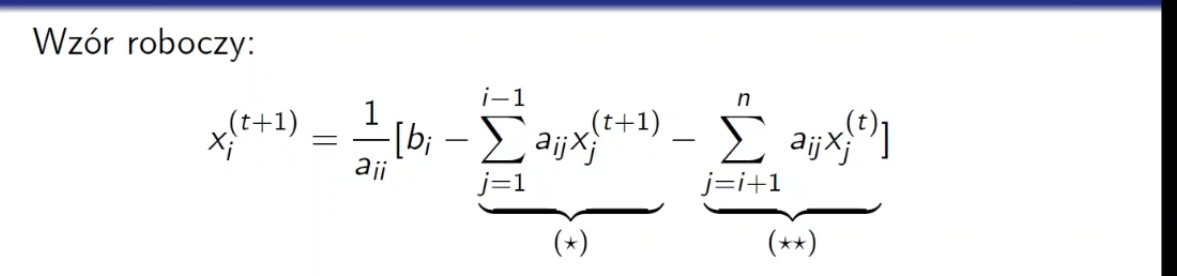

In [15]:
# Metoda podobna do metody jacobiego, z tym ze inaczej postepujemy przy wstepnym wzorz (inaczej go przeksztalcamy)
# Korzystamy z sąsiadów wyliczonych juz w iteracji i+1 (czyli aktulanej) oraz z sosiadow z poprzedniej iteracji

# wzór ostateczny:
# Dx^(t+1) = -Lx^(t+1) - Ux^(t) + b 
function gauss_seidel_laplace(T; maxiter=1000, tol=1e-6)
    n, m = size(T)
    errors = Float64[]  # lista błędów delta
    for iter in 1:maxiter
        delta = 0.0
        for j in 2:n-1
            for i in 2:m-1
                old = T[i, j]
                T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])
                delta = max(delta, abs(T[i, j] - old))
            end
        end
        push!(errors, delta)
        if delta < tol
            println("Gauss-Seidel: Zbieżność po $iter iteracjach")
            return T, iter, errors
        end
    end
    println("Gauss-Seidel: Osiągnięto max iteracji")
    return T, maxiter, errors
end


gauss_seidel_laplace (generic function with 1 method)

### Metoda SOR - Successive over-relaxation



In [16]:
# Jest to ulepszenie metody guass_seidela. Z tym, ze dodajemy do wzoru Omegę która mówi "o ile poprawiamy metode gaussa_seidela" 
# Dla omega = 1 wzór jest identyczny jak w methodzie gaussa.

# Optymalna omega pochodzi z twierdzenia i zostala podana w treści zadania.

function sor_laplace(T; maxiter=1000, tol=1e-6)
    n, m = size(T)
    N = n - 2
    rho = cos(pi / N)^2
    ω = 2 / (1 + sqrt(1 - rho))

    errors = Float64[]
    for iter in 1:maxiter
        delta = 0.0
        for j in 2:n-1
            for i in 2:m-1
                old = T[i, j]
                residual = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1]) - T[i, j]
                T[i, j] += ω * residual
                delta = max(delta, abs(T[i, j] - old))
            end
        end
        push!(errors, delta)
        if delta < tol
            println("SOR: Zbieżność po $iter iteracjach (ω = $ω)")
            return T, iter, errors
        end
    end
    println("SOR: Osiągnięto max iteracji")
    return T, maxiter, errors
end



sor_laplace (generic function with 1 method)

### Metoda Czebyszewa

#### Wzór roboczy
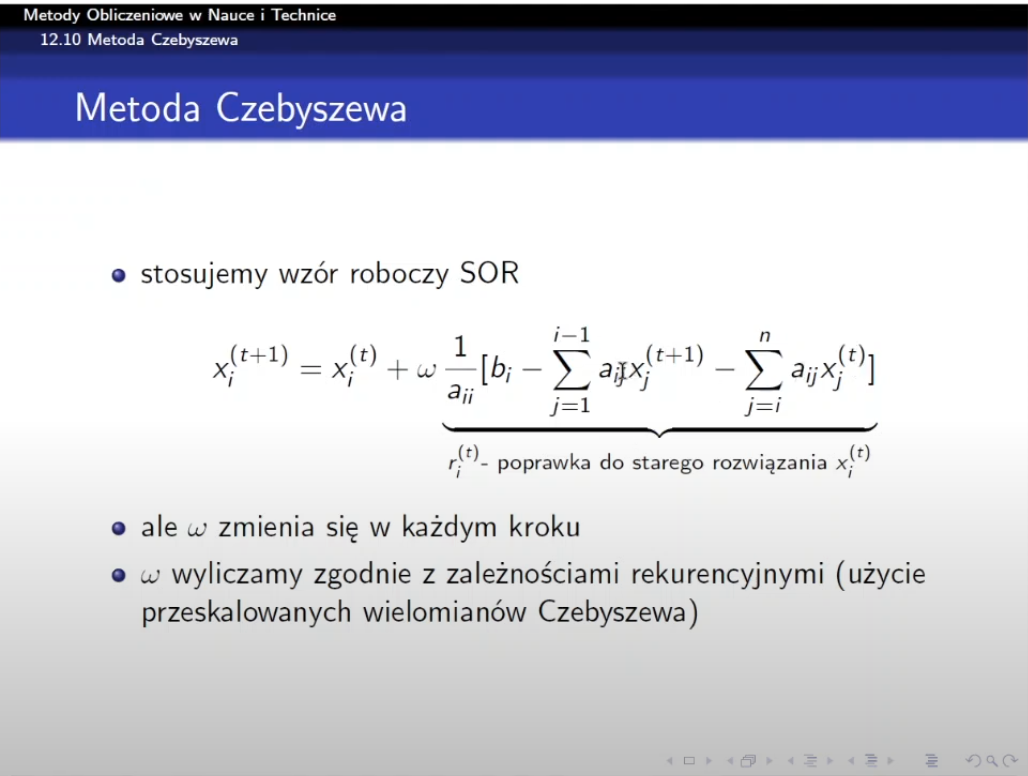
#### Pseudo kod
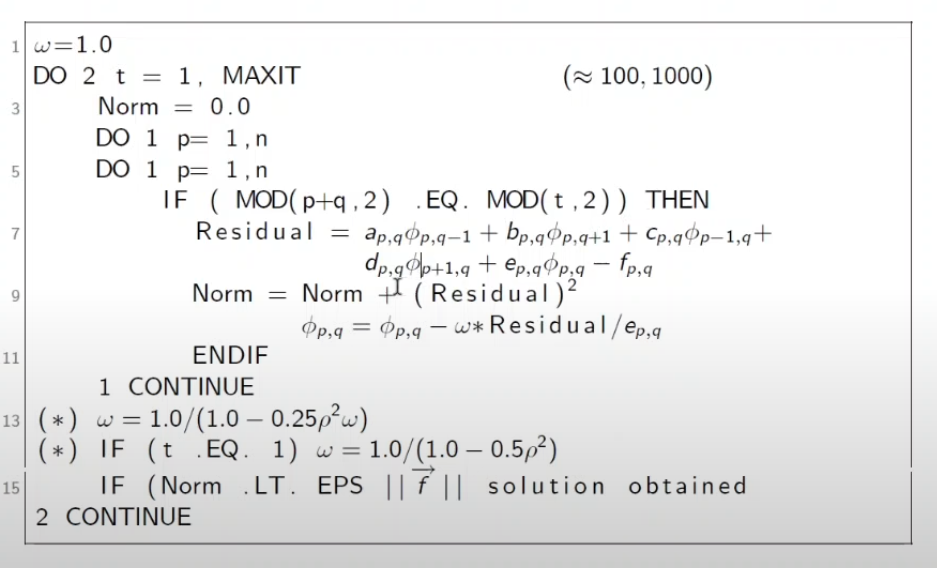

In [17]:
# Metoda Czebyszewa to iteracyjna metoda rozwiązywania równań liniowych,
# która przyspiesza zbieżność przez dynamiczne dobieranie kroku (alpha) na podstawie rozkładu wartości własnych.
# W przeciwieństwie do metod Gaussa-Seidla i SOR, nie używa bieżących wartości punktów z siatki, więc dobrze nadaje się do równoległych obliczeń.

# Wartość własna to liczba opisująca, jak bardzo macierz rozciąga lub ściska dany wektor (wektor własny),
# który nie zmienia kierunku po przemnożeniu przez macierz.
function chebyshev_laplace(T; maxiter=1000, tol=1e-6)
    n, m = size(T)
    N = n - 2

    lambda_max = 4.0
    lambda_min = 1e-1

    d = (lambda_max + lambda_min) / 2
    c = (lambda_max - lambda_min) / 2

    delta = 0.0
    alpha = 1 / d
    beta = 0.0

    delta_T = zeros(n, m)
    errors = Float64[]

    for iter in 1:maxiter
        for j in 2:n-1
            for i in 2:m-1
                delta_T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1]) - T[i, j]
            end
        end

        for j in 2:n-1
            for i in 2:m-1
                T[i, j] += alpha * delta_T[i, j]
            end
        end

        if iter == 1
            # nic
        elseif iter == 2
            beta = 0.5 * (c * alpha)^2
            alpha = 1 / (d - beta / alpha)
        else
            beta = (c * alpha / 2)^2
            alpha = 1 / (d - beta / alpha)
        end

        delta = maximum(abs.(alpha .* delta_T))
        push!(errors, delta)

        if delta < tol
            println("Chebyshev: Zbieżność po $iter iteracjach")
            return T, iter, errors
        end
    end

    println("Chebyshev: Osiągnięto max iteracji")
    return T, maxiter, errors
end


chebyshev_laplace (generic function with 2 methods)

In [22]:
T0 = create_initial_solution(10)
Tg, its_g, err_g = gauss_seidel_laplace(copy(T0))
Ts, its_s, err_s = sor_laplace(copy(T0))
Tc, its_c, err_c = chebyshev_laplace(copy(T0))

Gauss-Seidel: Zbieżność po 127 iteracjach
SOR: Zbieżność po 43 iteracjach (ω = 1.4464626921716894)
Chebyshev: Zbieżność po 314 iteracjach


([0.0 0.0 … 0.0 100.0; 0.0 1.3709241969074848 … 48.629070803195084 100.0; … ; 0.0 1.3709241969074848 … 48.629070803195084 100.0; 0.0 0.0 … 0.0 100.0], 314, [12.195121951219514, 16.838674633351438, 12.187773269653892, 7.269802965412691, 5.065906044382371, 3.846281972711392, 3.3920702480070384, 2.9961108856930503, 2.655615809198148, 2.362898845098762  …  1.4763949332080255e-6, 1.4100098552477704e-6, 1.3466097393247086e-6, 1.2860603628167819e-6, 1.228233545133052e-6, 1.1730068722331056e-6, 1.1202634317418686e-6, 1.069891561308676e-6, 1.0217846261037169e-6, 9.7584078836792e-7])

### Omówienie wyników
- SOR to zoptymalizowany gauss_seidel, więc wynik jest osiągany szybciej
- Chebyshev wyszedł gorzej, ale jest to okej, poniewaz algorytm ten w przeciwienstiwe do dwoch powyzszych da sie zrownoleglic, co jest jego duzą moca

# Zadanie 2
Zmieniamy rozmiar siatki N∈{10,20,40,80,120,160}, a dla każdej metody zapisujemy liczbę iteracji potrzebną do osiągnięcia zbieżności. Na koniec rysujemy wykres.

In [24]:
import Pkg
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed libfdk_aac_jll ─────────────── v2.0.3+0
   Installed JpegTurbo_jll ──────────────── v3.1.1+0
   Installed Libmount_jll ───────────────── v2.41.0+0
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed LoggingExtras ──────────────── v1.1.0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed GR_jll ─────────────────────── v0.73.16+0
   Installed LERC_jll ───────────────────── v4.0.1+0
   Installed Opus_jll ───────────────────── v1.3.3+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.7+0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Measures ───────────────────── v0.3.2
   Installed Unitful ────────────────────── v1.23.1
   Installed Contour ────────────────────── v0.6.3
   Installed ConcurrentUtilities ────────── v2.5.0
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.2+0
   Installed Grisu ──────────────────────── v1.0.2
   Installed Rec

Rozmiar: 10
Gauss-Seidel: Zbieżność po 127 iteracjach
SOR: Zbieżność po 43 iteracjach (ω = 1.4464626921716894)
Chebyshev: Zbieżność po 314 iteracjach
Rozmiar: 20
Gauss-Seidel: Zbieżność po 513 iteracjach
SOR: Zbieżność po 78 iteracjach (ω = 1.704088191041847)
Chebyshev: Osiągnięto max iteracji
Rozmiar: 40
Gauss-Seidel: Osiągnięto max iteracji
SOR: Zbieżność po 145 iteracjach (ω = 1.8474396434446976)
Chebyshev: Osiągnięto max iteracji
Rozmiar: 80
Gauss-Seidel: Osiągnięto max iteracji
SOR: Zbieżność po 276 iteracjach (ω = 1.9225852956308829)
Chebyshev: Osiągnięto max iteracji
Rozmiar: 120
Gauss-Seidel: Osiągnięto max iteracji
SOR: Zbieżność po 410 iteracjach (ω = 1.9481395103996326)
Chebyshev: Osiągnięto max iteracji
Rozmiar: 160
Gauss-Seidel: Osiągnięto max iteracji
SOR: Zbieżność po 562 iteracjach (ω = 1.961010814963657)
Chebyshev: Osiągnięto max iteracji


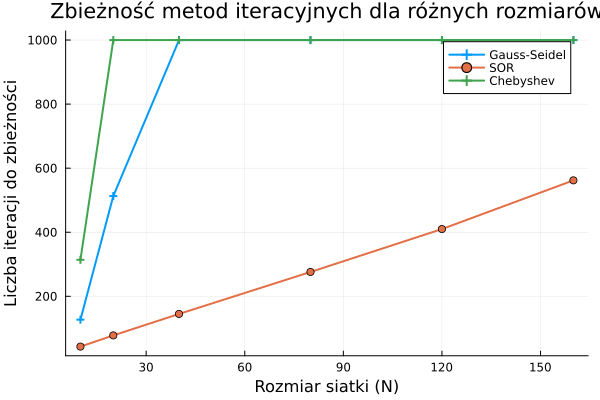

In [25]:
using Plots

sizes = [10, 20, 40, 80, 120, 160]
iters_gauss = Int[]
iters_sor = Int[]
iters_cheb = Int[]

for N in sizes
    println("Rozmiar: $N")
    T0 = create_initial_solution(N)

    _, it_g, _ = gauss_seidel_laplace(copy(T0))
    _, it_s, _ = sor_laplace(copy(T0))
    _, it_c, _ = chebyshev_laplace(copy(T0))

    push!(iters_gauss, it_g)
    push!(iters_sor, it_s)
    push!(iters_cheb, it_c)
end

plot(
    sizes,
    [iters_gauss iters_sor iters_cheb],
    labels = ["Gauss-Seidel" "SOR" "Chebyshev"],
    xlabel = "Rozmiar siatki (N)",
    ylabel = "Liczba iteracji do zbieżności",
    title = "Zbieżność metod iteracyjnych dla różnych rozmiarów",
    lw = 2,
    marker = :auto,
    legend = :topright
)


# Zadanie 3

Gauss-Seidel: Osiągnięto max iteracji
SOR: Zbieżność po 562 iteracjach (ω = 1.961010814963657)
Chebyshev: Osiągnięto max iteracji


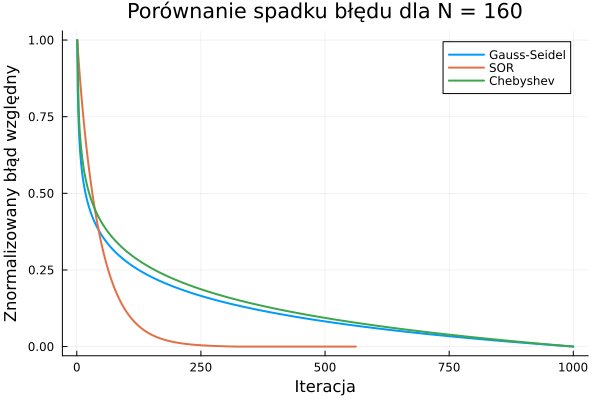

In [26]:
using Plots

function relative_error(errors)
    total = sum(errors)
    return [sum(errors[i:end]) / total for i in 1:length(errors)]
end

N = 160  # lub dowolna większa wartość
T0 = create_initial_solution(N)

_, _, err_g = gauss_seidel_laplace(copy(T0))
_, _, err_s = sor_laplace(copy(T0))
_, _, err_c = chebyshev_laplace(copy(T0))

rel_g = relative_error(err_g)
rel_s = relative_error(err_s)
rel_c = relative_error(err_c)

plot(
    1:length(rel_g), rel_g,
    label = "Gauss-Seidel",
    xlabel = "Iteracja",
    ylabel = "Znormalizowany błąd względny",
    lw = 2
)
plot!(1:length(rel_s), rel_s, label = "SOR", lw = 2)
plot!(1:length(rel_c), rel_c, label = "Chebyshev", lw = 2)
title!("Porównanie spadku błędu dla N = $N")


### Opis wynikow
Widać, że metoda SOR najszybciej osiąga zbieżność, wyraźnie przewyższając metody Gaussa-Seidela i Czebyszewa. Metoda Gaussa-Seidela zbiega najwolniej, co potwierdza jej niższą efektywność dla dużych rozmiarów problemu.

# Zadanie 4

In [ ]:
function poisson_membrane(N; p=1.0, T=1.0, tol=1e-6, maxiter=10000)
    h = 1.0 / (N - 1)
    rhs = -p / T

    u = zeros(N, N)  # u[i,j] = przemieszczenie membrany

    # użyjemy SOR, jak wcześniej
    rho = cos(pi / (N - 2))^2
    ω = 2 / (1 + sqrt(1 - rho))

    for iter in 1:maxiter
        delta = 0.0
        for j in 2:N-1
            for i in 2:N-1
                old = u[i, j]
                u[i, j] = (1 - ω) * u[i, j] + (ω / 4) * (
                    u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - h^2 * rhs
                )
                delta = max(delta, abs(u[i, j] - old))
            end
        end
        if delta < tol
            println("Zbieżność po $iter iteracjach")
            break
        end
    end
    return u
end

# Przykład użycia:
N = 100
u = poisson_membrane(N)


Zbieżność po 200 iteracjach


Zbieżność po 200 iteracjach


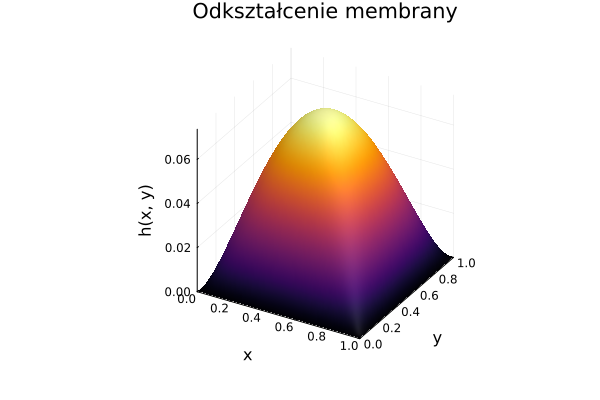

In [31]:
using Plots

function visualize_membrane(u)
    N = size(u, 1)
    x = range(0, 1, length=N)
    y = range(0, 1, length=N)
    surface(x, y, u, xlabel="x", ylabel="y", zlabel="h(x, y)", title="Odkształcenie membrany", legend=false)
end

# Zakładamy, że masz już `u` obliczone np. przez poisson_membrane(N)
u = poisson_membrane(100)
visualize_membrane(u)


### Analiza wynikow
Maksymalne ugięcie obserwujemy w środku membrany, co jest zgodne z intuicją fizyczną.

Zastosowano wizualizację 3D powierzchni z użyciem siatki o rozmiarze \( N = 100 \).